# Кластеризация (DBSCAN, OPTICS)

## Выполнение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## DBSCAN

Стандартизируем данные, так как разные признаки лежат в разных шкалах

In [47]:
unlabeled_data = data
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(unlabeled_data);

In [48]:
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

Проведем кластеризацию методов DBSCAN при параметрах по умолчанию.

In [85]:
clustering = DBSCAN().fit(scaled_data)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Метки кластеров:", set(labels))
print("Число кластеров: ", n_clusters_)
print("% некластеризованных: ", n_noise_ / len(list(labels))*100)

Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
Число кластеров:  36
% некластеризованных:  75.12737378415933


Параметры DBSCAN:
1. eps: максимальное допустимое расстояние между двумя сэмплами одного кластера
2. min_samples: число соседей в окрестности точки, необходимое для того, чтобы она считалась базовой (точка входит в подсчет)
3. metric: метрика, которая используется для вычисления расстояния
4. metric_params: дополнительные аргументы для функции метрики
5. algorithm: алгоритм, который используется для нахождения ближних соседей для вычисления точечных расстояний
6. leaf_size: размер листа дерева в algorithm
7. p: степени метрики Минковского, которая будет использоваться для вычисления расстояния между точками
8. n_jobs: количество параллельных потоков    

In [69]:
eps_ = np.arange(0.01, 2.0, 0.25)
info = []
for eps in eps_:
    clustering = DBSCAN(eps=eps, n_jobs=-1).fit(scaled_data)
    labels = clustering.labels_
    labels_set = set(labels)
    info.append([len(labels_set) - (1 if -1 in labels else 0), list(labels).count(-1) / len(list(labels))])

построим график количества кластеров и процента не кластеризованных наблюдений в зависимости от максимальной рассматриваемой дистанции между наблюдениями

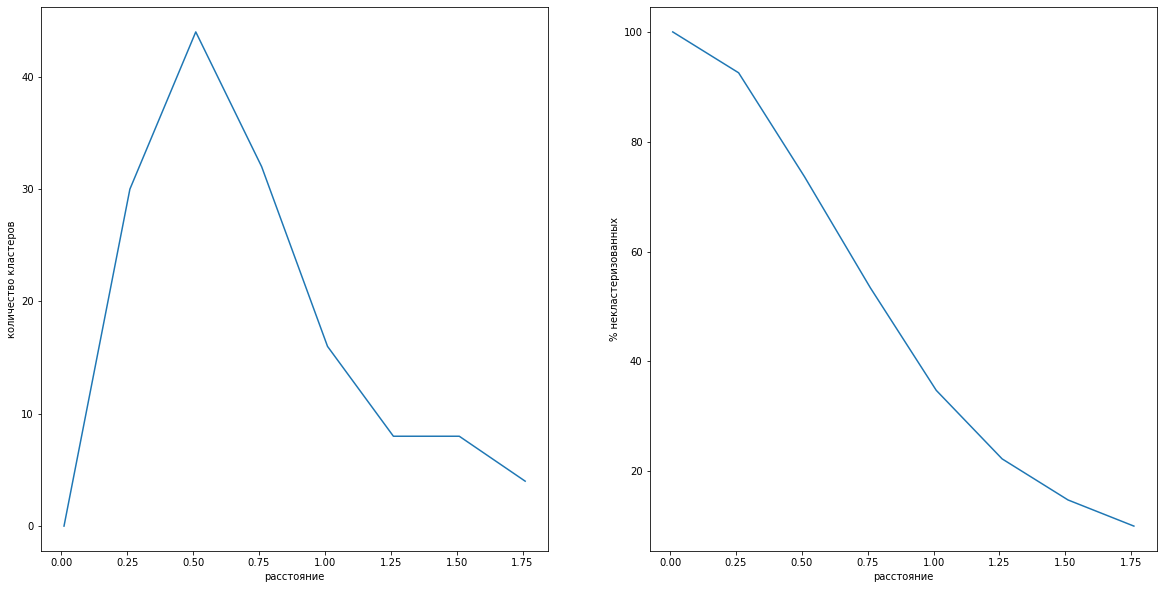

In [70]:
info = np.array(info)
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(eps_, info[:,0])
ax[0].set_xlabel('расстояние')
ax[0].set_ylabel('количество кластеров')
ax[1].plot(eps_, info[:,1]*100)
ax[1].set_xlabel('расстояние')
ax[1].set_ylabel('% некластеризованных')
plt.show()

построим график количества кластеров и процента не кластеризованных наблюдений в зависимости от минимального значения количества точек, образующих кластер.


In [71]:
min_samples_ = np.arange(3, 20, 1)
info = []
for min_samples in min_samples_:
    clustering = DBSCAN(min_samples=min_samples, n_jobs=-1).fit(scaled_data)
    labels = clustering.labels_
    labels_set = set(labels)
    info.append([len(labels_set) - (1 if -1 in labels else 0), list(labels).count(-1) / len(list(labels))])

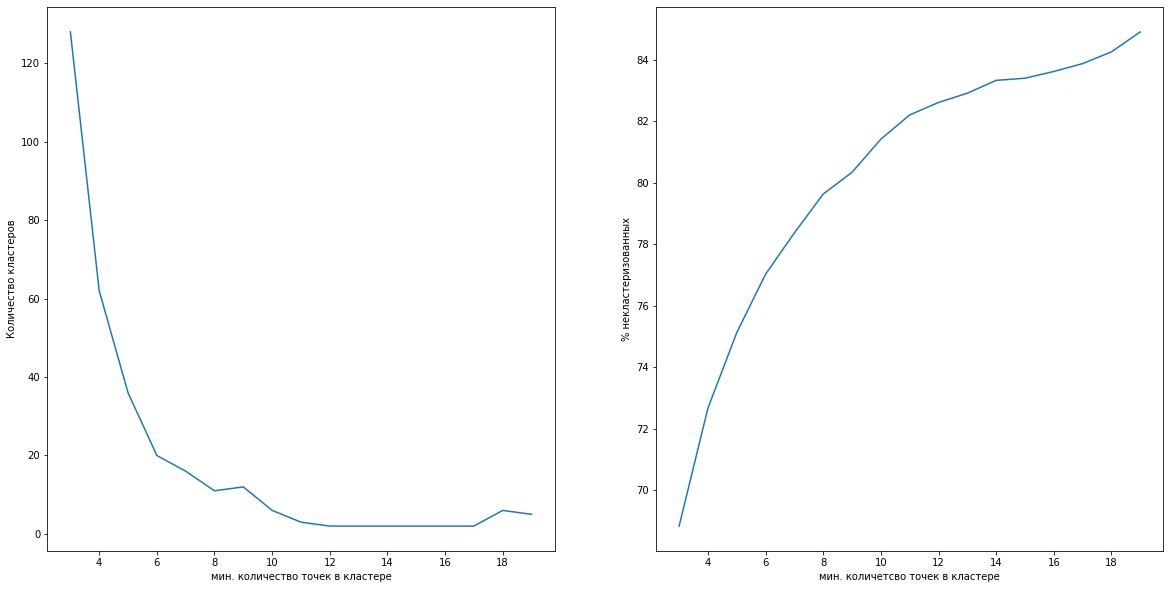

In [72]:
info = np.array(info)
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(min_samples_, info[:,0])
ax[0].set_xlabel('мин. количество точек в кластере')
ax[0].set_ylabel('Количество кластеров')
ax[1].plot(min_samples_, info[:,1]*100)
ax[1].set_xlabel('мин. количетсво точек в кластере')
ax[1].set_ylabel('% некластеризованных')
plt.show()

определим значения параметров, при котором количество кластеров получается от 5 до 7, и процент не кластеризованных наблюдений не превышает 12%

In [74]:
min_samples_ = np.arange(1, 4, 1)
eps_ = np.arange(1.5, 2.5, 0.1)

for min_samples in min_samples_:
    for eps in eps_:
        clustering = DBSCAN(eps=eps ,min_samples=min_samples, n_jobs=-1).fit(scaled_data)
        labels = clustering.labels_
        labels_set = set(labels)
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1) / len(list(labels))
        if n_clusters_>=5 and n_clusters_<=7 and n_noise_<=0.12:
            print("Число кластеров: ", n_clusters_)
            print("% некластеризованных", n_noise_*100)
            print("min_samples", min_samples)
            print("eps", eps)

Число кластеров:  6
% некластеризованных 6.287633163501622
min_samples 3
eps 2.0000000000000004


понизим размерность данных до 2 c помощью метод главных компонент

In [75]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
pca.explained_variance_ratio_

clustering = DBSCAN(eps=2, min_samples=3, n_jobs=-1).fit(scaled_data)

In [76]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
unique_labels.remove(-1)
unique_labels = [-1, *list(unique_labels)]
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

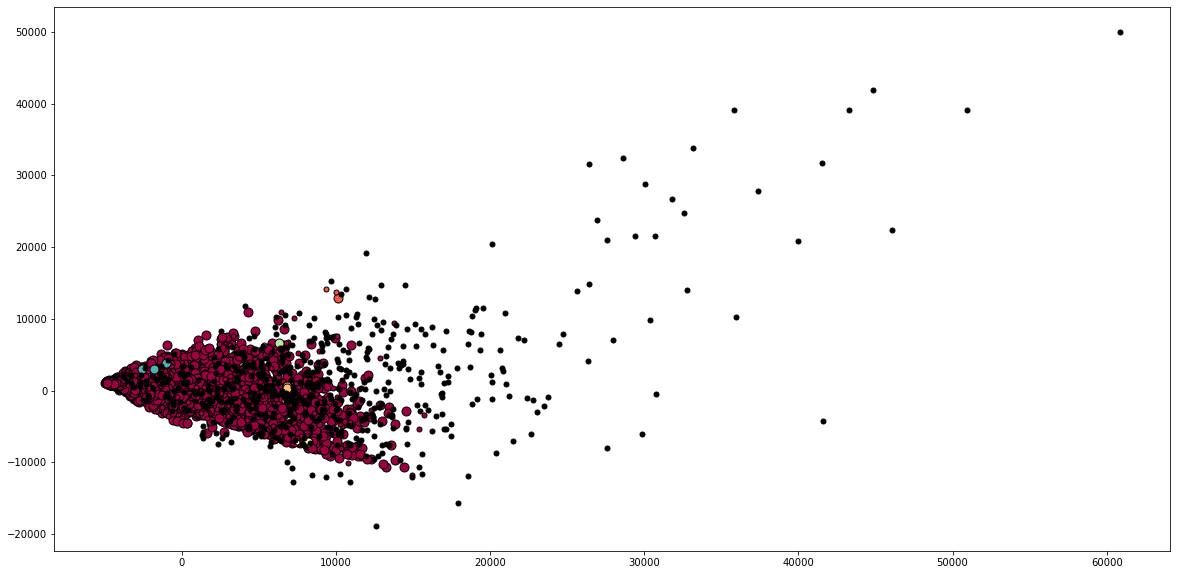

In [95]:
plt.figure(figsize=(20, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=9)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

### OPTICS

Параметры OPTICS:
1. min_samples: число соседей в окрестности точки, необходимое для того, чтобы она считалась базовой
2. max_eps: максимальное допустимое расстояние между двумя сэмплами одного кластера
3. metric: метрика, которая используется для вычисления расстояния
5. p: степени метрики Минковского, которая будет использоваться для вычисления расстояния между точками
6. metric_params: дополнительные аргументы для функции метрики
7. cluster_method: метод определения кластера
8. eps: то же самое, что в dbscan (используется, если cluster_method='dbscan')
9. xi: минимальное число сэмплов (используется, если cluster_method='xi')
10. predecessor_correction: корректировка кластеров на основе предшественников (используется, если cluster_method='xi')
11. min_cluster_size: минимальное число сэмплов в кластере
12. algorithm: алгоритм, который используется для нахождения ближних соседей для вычисления точечных расстояний
13. leaf_size: размер листа дерева в algorithm
14. n_jobs: количество параллельных потоков

найдем такие параметры метода OPTICS (*max_eps *и min_samples) при которых, чтобы получить результаты близкие к результатам DBSCAN из пункта 6

Метки кластеров: {0, 1, 2, 3, 4, 5, -1}
Число кластеров:  6
% некластеризованных:  6.310792033348772


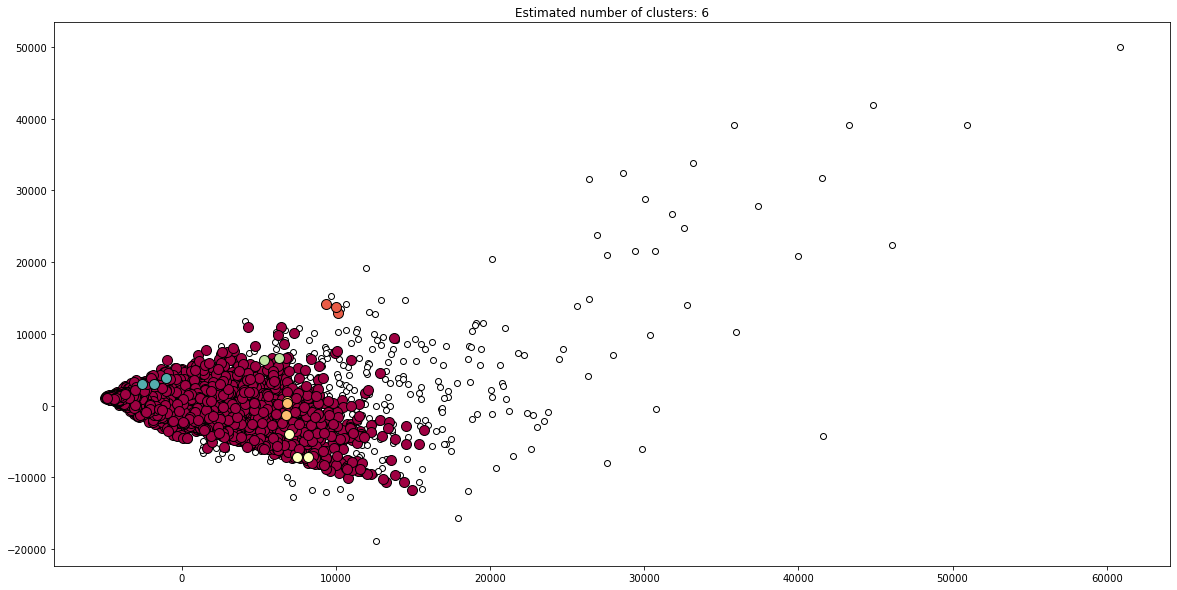

In [94]:
clustering = OPTICS(max_eps=2, min_samples=3, cluster_method='dbscan').fit(scaled_data)
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Метки кластеров:", set(labels))
print("Число кластеров: ", n_clusters_)
print("% некластеризованных: ", n_noise_ / len(list(labels))*100)
plt.figure(figsize=(20, 10))
pca_data = PCA(n_components=2).fit_transform(data)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

xy = pca_data[(labels == -1)]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='w',
         markeredgecolor='k', markersize=6)

for k, col in zip(unique_labels, colors):
    if k == -1:
        continue

    class_member_mask = (labels == k)

    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Отличие OPTICS от DBSCAN\
Unlike DBSCAN, keeps cluster hierarchy for a variable neighborhood radius. Better suited for usage on large datasets than the current sklearn implementation of DBSCAN.\
В отличие от DBSCAN, сохраняет иерархию для разных радиусов окрестностей. Больше подходит для больших датасетов, чем текущая версия DBSCAN в sklearn.

In [91]:
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec

def show_optics(clust):
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(scaled_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(20, 10))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    ax2.plot(pca_data[clust.labels_ == -1, 0], pca_data[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 5), colors):
        Xk = pca_data[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    ax3.plot(pca_data[labels_050 == -1, 0], pca_data[labels_050 == -1, 1], 'k+', alpha=0.1)
    for klass, color in zip(range(0, 6), colors):
        Xk = pca_data[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = pca_data[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(pca_data[labels_200 == -1, 0], pca_data[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

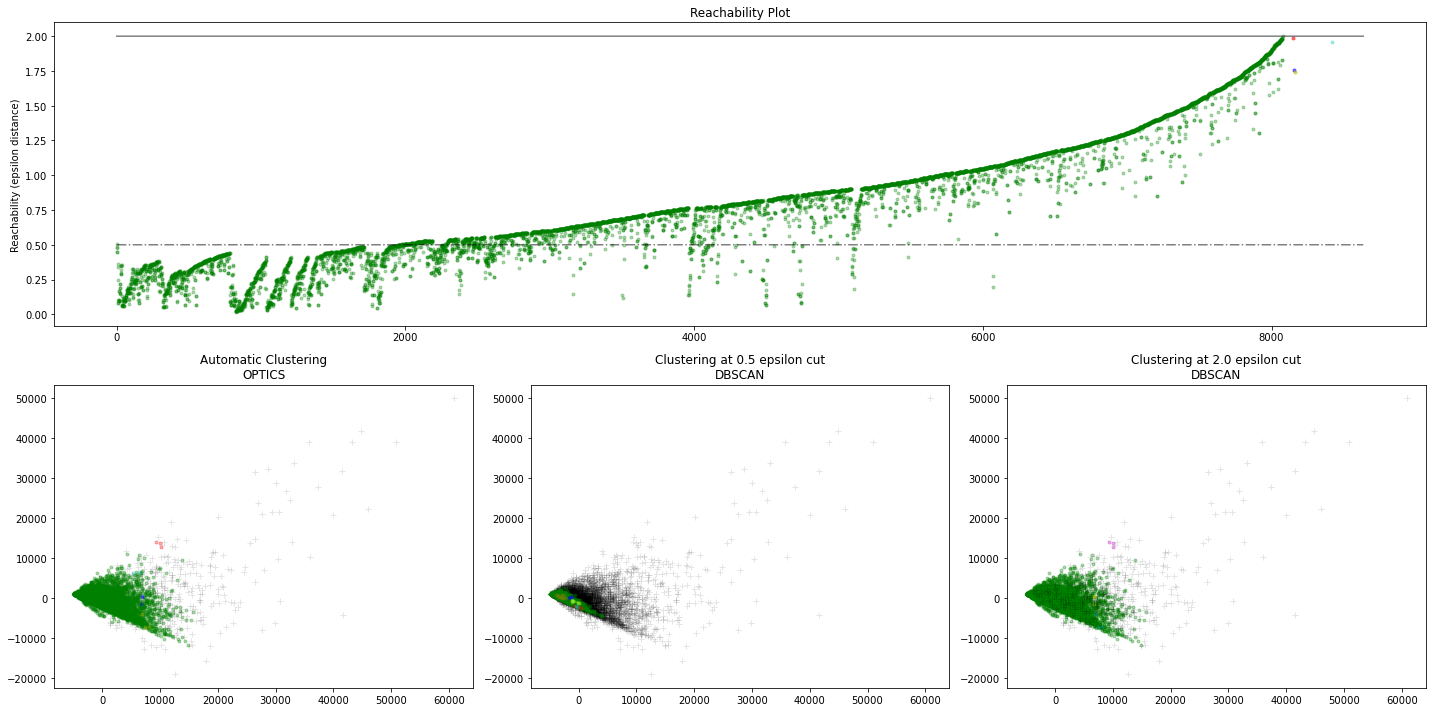

In [92]:
show_optics(clustering)

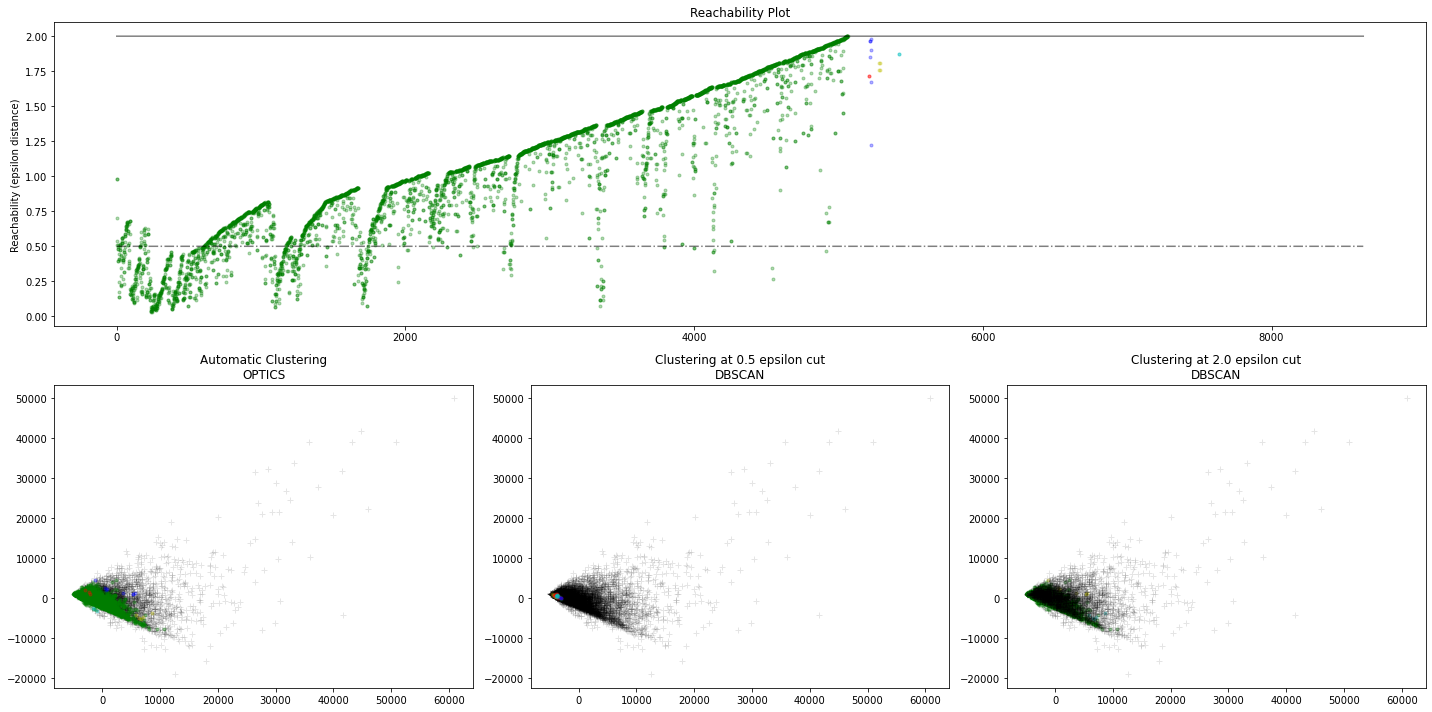

cityblock
Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
Число кластеров:  55
% некластеризованных:  39.49745252431681


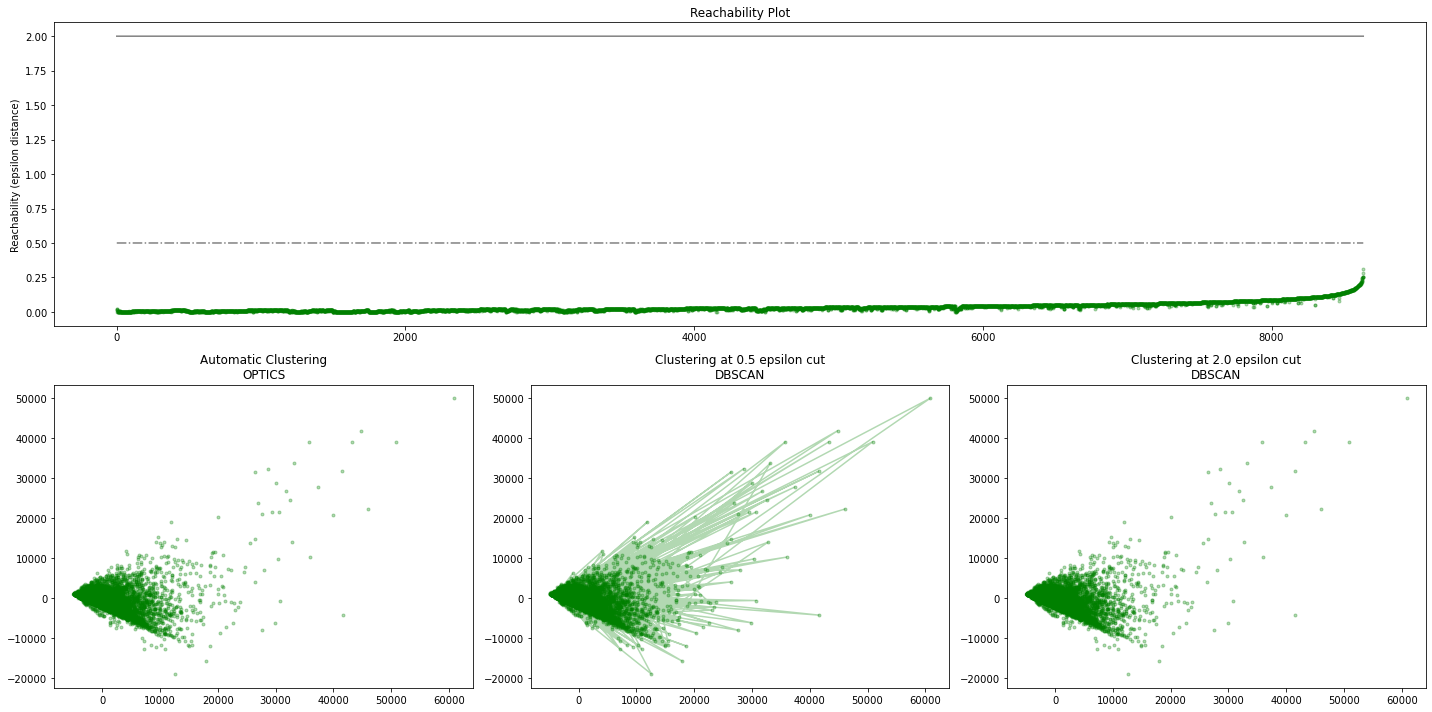

cosine
Метки кластеров: {0}
Число кластеров:  1
% некластеризованных:  0.0


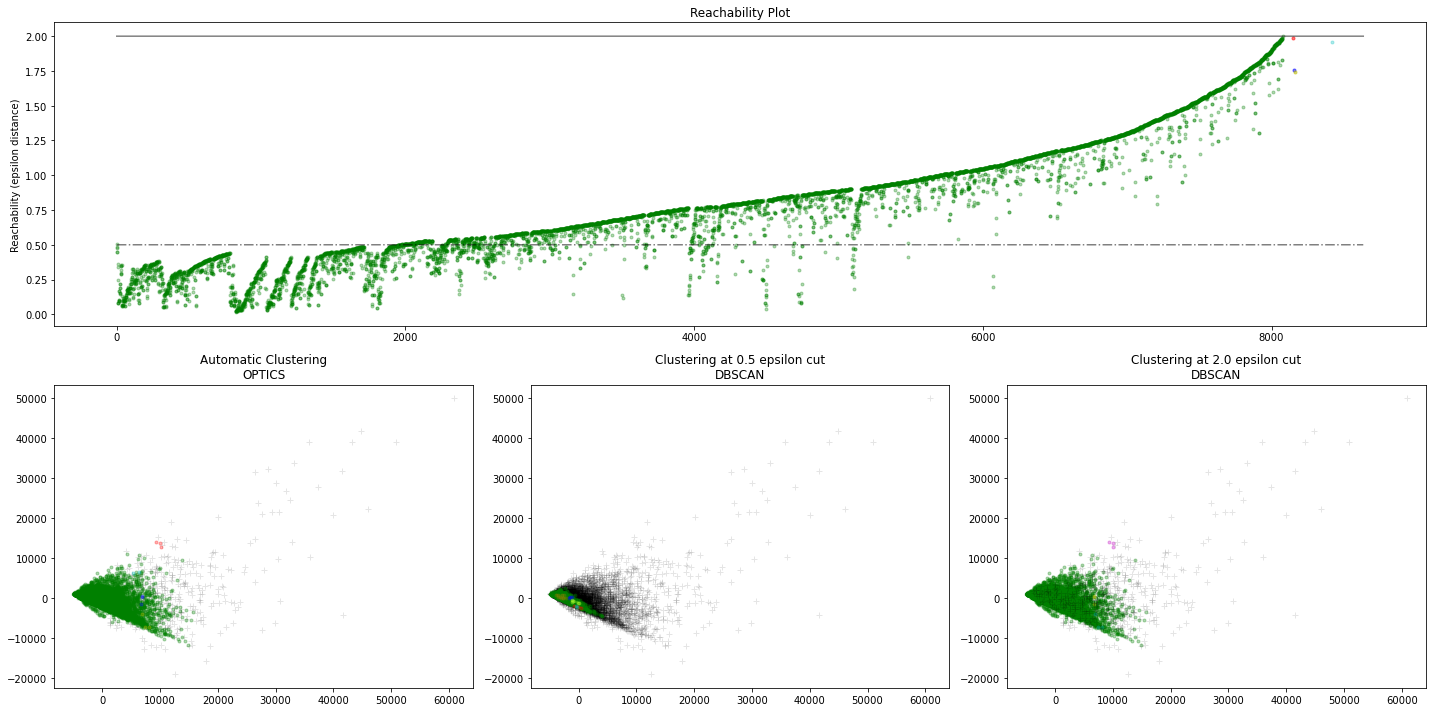

euclidean
Метки кластеров: {0, 1, 2, 3, 4, 5, -1}
Число кластеров:  6
% некластеризованных:  6.310792033348772


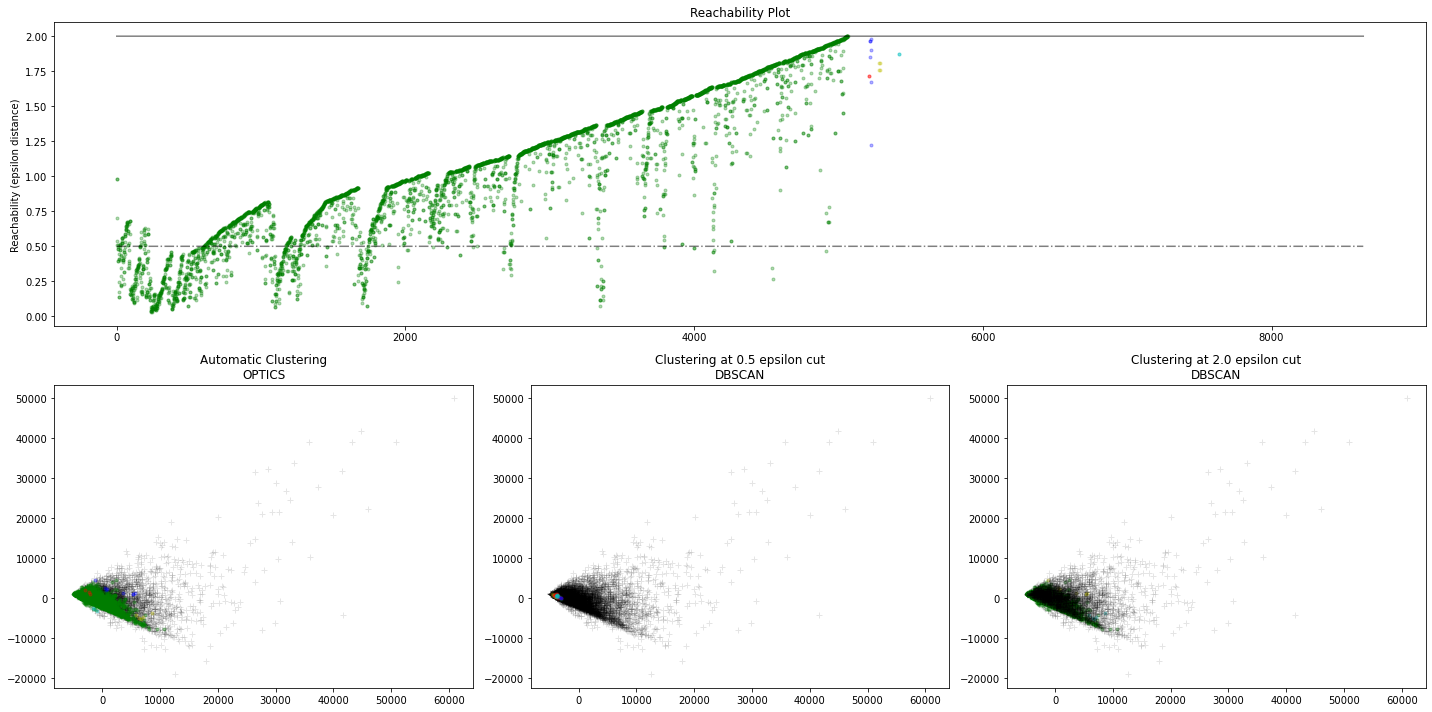

l1
Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
Число кластеров:  55
% некластеризованных:  39.49745252431681


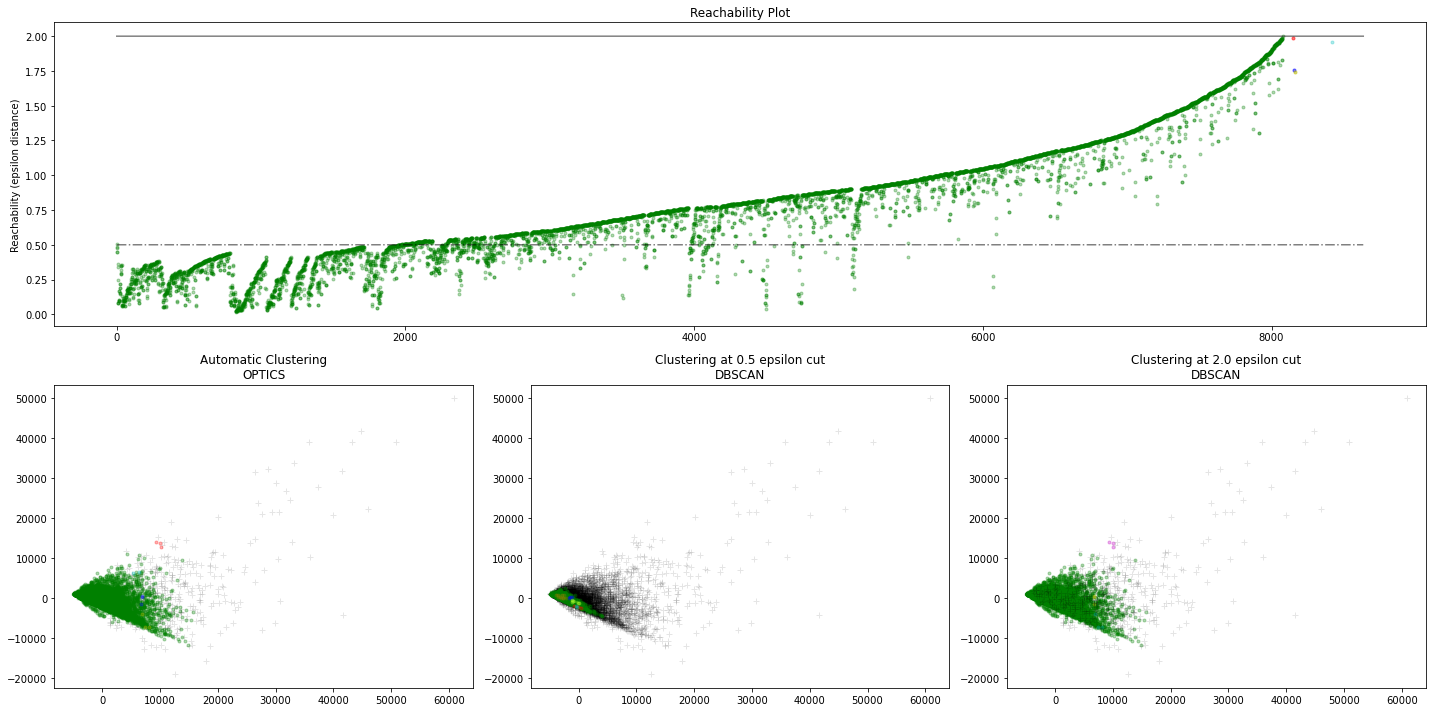

l2
Метки кластеров: {0, 1, 2, 3, 4, 5, -1}
Число кластеров:  6
% некластеризованных:  6.310792033348772


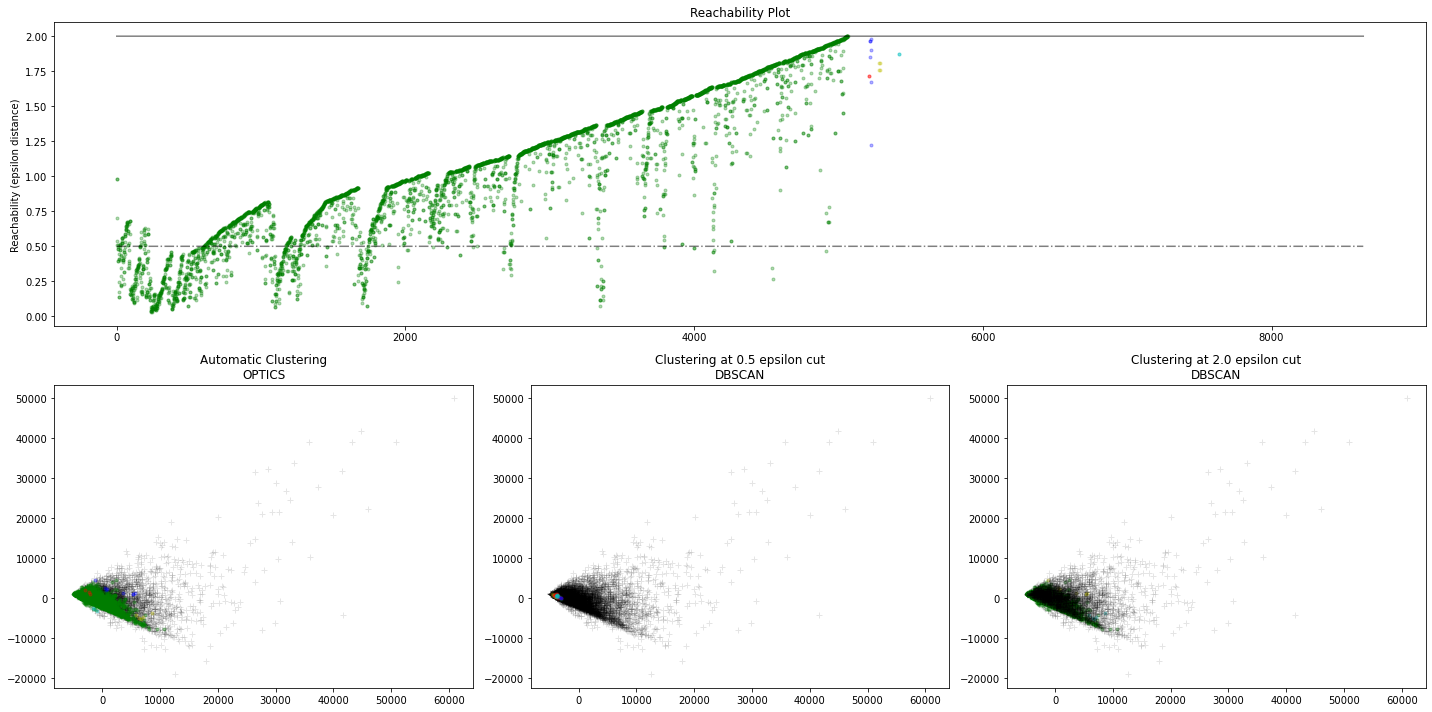

manhattan
Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
Число кластеров:  55
% некластеризованных:  39.49745252431681


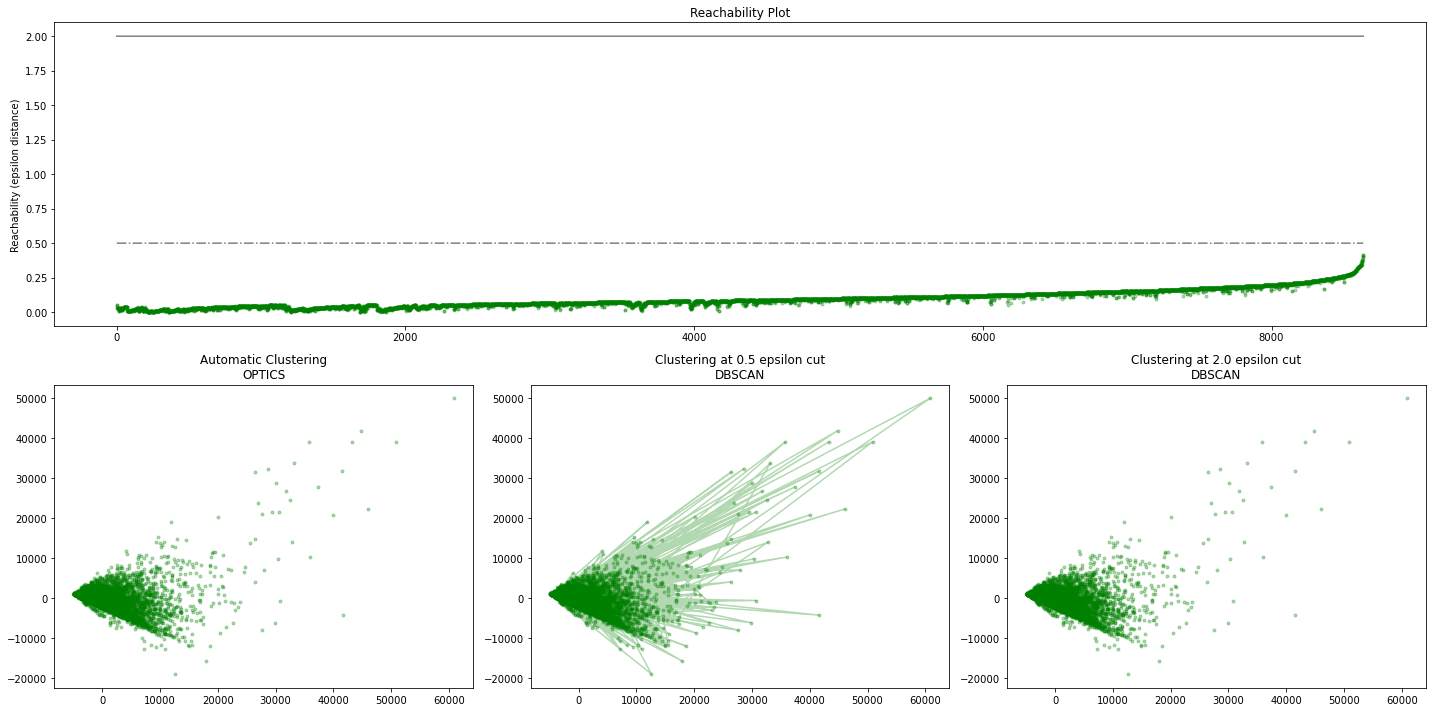

braycurtis
Метки кластеров: {0}
Число кластеров:  1
% некластеризованных:  0.0


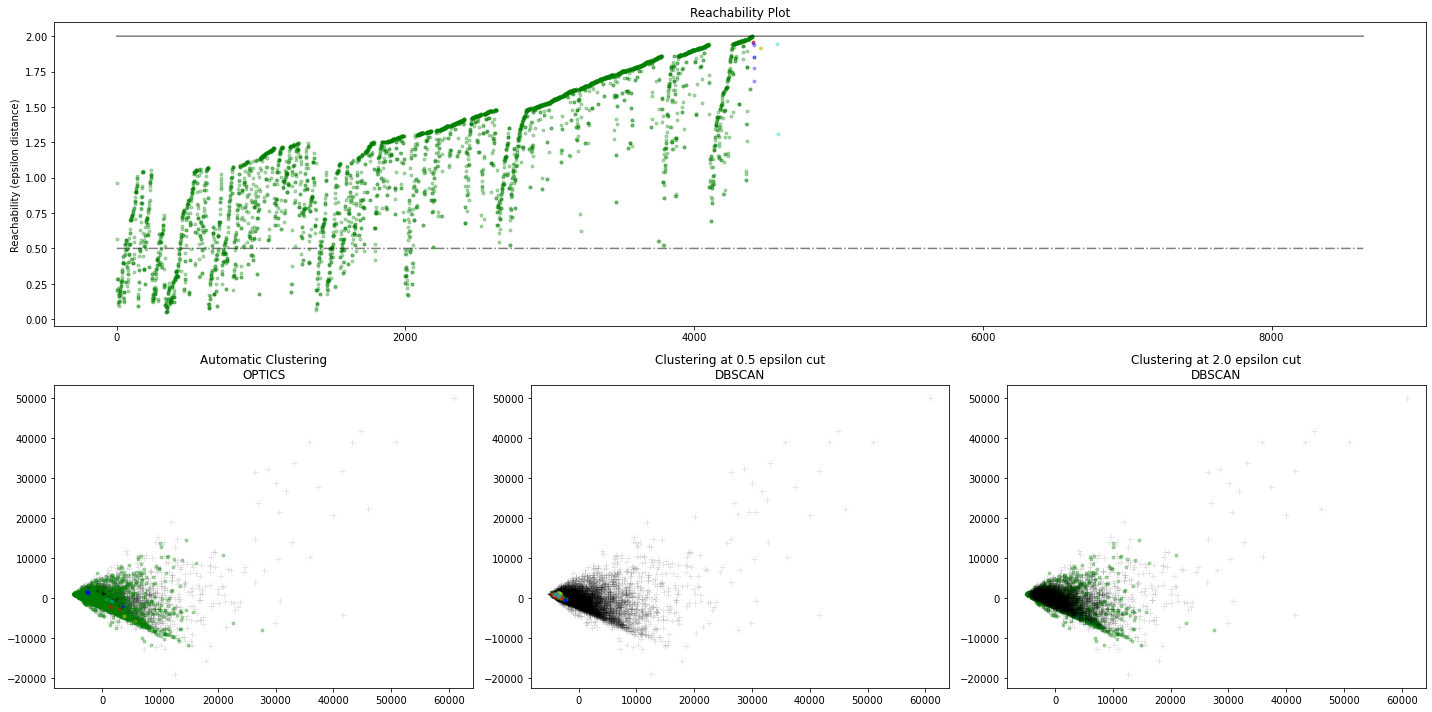

canberra
Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, -1}
Число кластеров:  60
% некластеризованных:  46.41037517369153


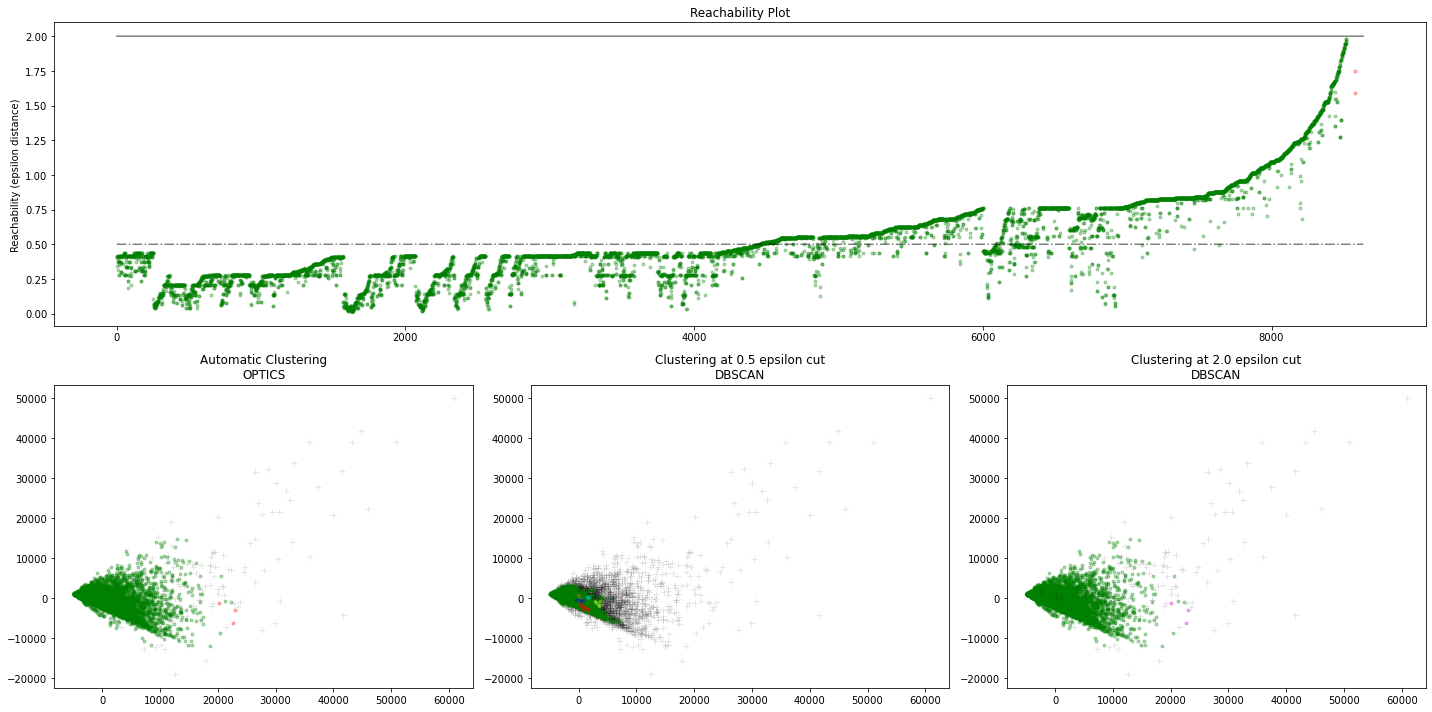

chebyshev
Метки кластеров: {0, 1, -1}
Число кластеров:  2
% некластеризованных:  1.331635016211209


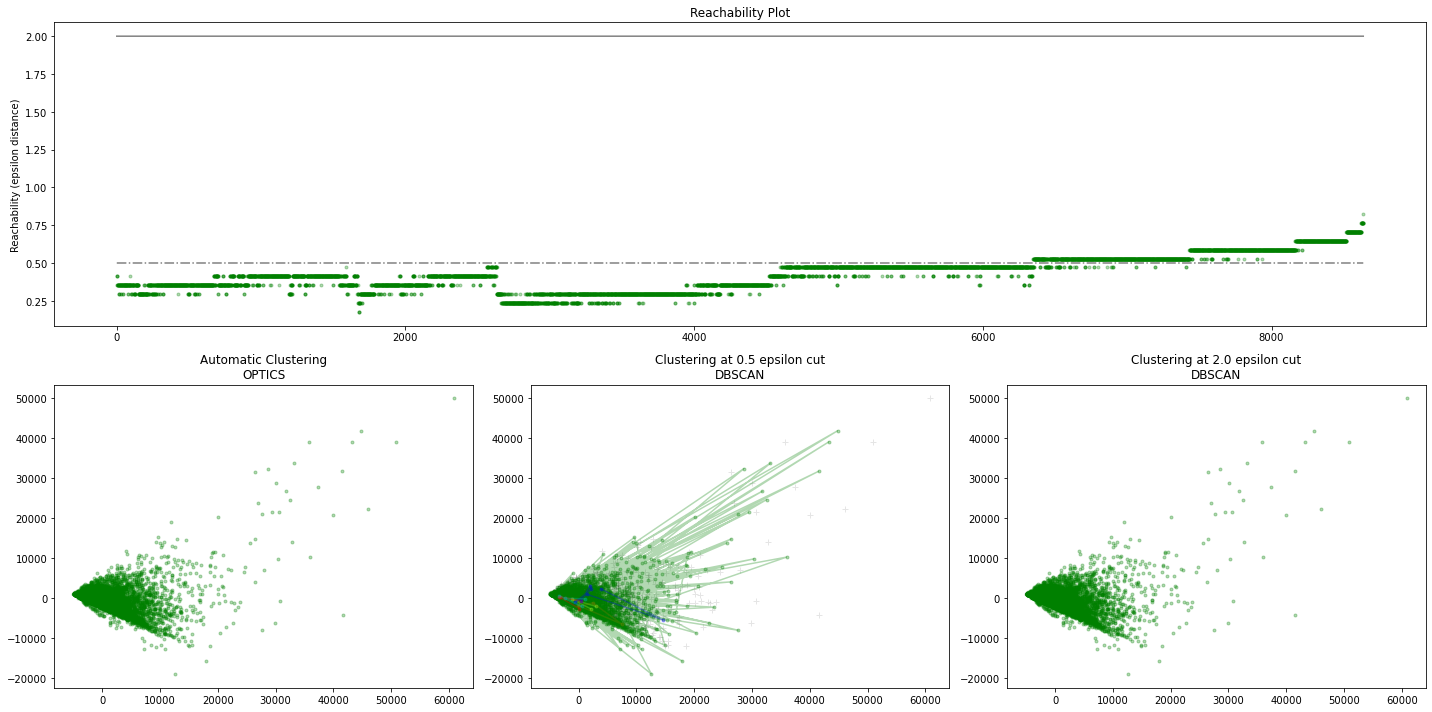

hamming
Метки кластеров: {0}
Число кластеров:  1
% некластеризованных:  0.0


In [93]:
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'braycurtis', 'canberra', 'chebyshev', 'hamming']
for metric in metrics:
    clustering = OPTICS(min_samples=3, max_eps=2, n_jobs=-1, cluster_method="dbscan", metric=metric).fit(scaled_data)
    labels = clustering.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    show_optics(clustering)
    print(metric)
    print("Метки кластеров:", set(labels))
    print("Число кластеров: ", n_clusters_)
    print("% некластеризованных: ", n_noise_ / len(list(labels))*100)
    